# description: running an RNN model for classification of 4 targets in B1


In [1]:
# loading the library
import numpy as np
import os
import os.path
import scipy.io
from scipy.io import loadmat
import hdf5storage as hdf5s
import h5py


In [13]:

# Experiment info 
# loading the imagined data

# initilize the values
class structtype():
    pass

ExptDays = list(['20201002','20201009','20201016','20201030','20201113','20201117','20201118','20201125','20201211'])
NumDay = len(ExptDays);
SessionDay = [ structtype() for i in range(NumDay)]
SessionDay[0].hhmmss = list(['145058','145910','150443','151528','152108'])
SessionDay[1].hhmmss = list(['134342','134836','135450','135947'])
SessionDay[2].hhmmss = list(['142924','144138','144924'])
SessionDay[3].hhmmss = list(['133902','134541','134838','141625','142426'])
SessionDay[4].hhmmss = list(['134350','135330','135938','140554'])
SessionDay[5].hhmmss = list(['111747','112508','113040','141009'])
SessionDay[6].hhmmss = list(['140255','140540'])
SessionDay[7].hhmmss = list(['105228','111217','112507','112711','113526','114108','143218','143824'])
SessionDay[8].hhmmss = list(['114458','114725'])

# for reading mat file from matlab
# it is easier to use class for further extracting necessary params or data
class MatFileAnalyzer():
    
    # first mandatory method; constructor
    def __init__(self,Mat_data):
        self.Fs = Mat_data['TrialData']['Params']['Fs'][0][0]
        self.UpdateRate = Mat_data['TrialData']['Params']['UpdateRate'][0][0]
        self.TargetID = Mat_data['TrialData']['TargetID'][0][0]
        self.SelectedTargetID = Mat_data['TrialData']['SelectedTargetID'][0][0]
        self.MaxReachTime = Mat_data['TrialData']['Params']['MaxReachTime'][0][0]
        self.Click_BinNum = Mat_data['TrialData']['Params']['ClickCounter'][0][0]
        
    def ECoG_Raw(self):

        Signals = Mat_data['TrialData']['BroadbandData']
        BinNum = Signals.shape[0]
        ECoGData = np.empty((0,128), dtype=float)
        for i in range(BinNum):
            Bin = Mat_data['TrialData']['BroadbandData'][i][0]
            BinName = h5py.h5r.get_name(Bin, Mat_data.id)
            BinInfo = Mat_data[BinName] 
            BinData = BinInfo[:,:]
            ECoGData = np.concatenate((ECoGData, BinData.T), axis=0)

        return ECoGData
    
    
    def ECoG_Raw_Trial(self):
        
        Signals = Mat_data['TrialData']['BroadbandData']
        BinNum = Signals.shape[0]
        ECoGData_Trial = np.empty((0,128), dtype=float)
        
        if ExptDays[Day] == '20201002':
        
            for i in range(BinNum-int(self.Click_BinNum),BinNum,1):
                Bin = Mat_data['TrialData']['BroadbandData'][i][0]
                BinName = h5py.h5r.get_name(Bin, Mat_data.id)
                BinInfo = Mat_data[BinName] 
                BinData = BinInfo[:,:]
                ECoGData_Trial = np.concatenate((ECoGData_Trial, BinData.T), axis=0)

            return ECoGData_Trial
        
        else:
                        
            BinControl = [] 
            for i in range(BinNum):
                if Mat_data['TrialData']['TaskState'][i][0] == 3:
                    BinControl.append(i)
             
            for j in BinControl[-int(TrialData.Click_BinNum):]:
                if ExptDays[Day] == '20201009':
                    j=j-1
                    
                Bin = Mat_data['TrialData']['BroadbandData'][j][0]
                BinName = h5py.h5r.get_name(Bin, Mat_data.id)
                BinInfo = Mat_data[BinName] 
                BinData = BinInfo[:,:]
                ECoGData_Trial = np.concatenate((ECoGData_Trial, BinData.T), axis=0)
                
            return ECoGData_Trial
        
    
    def Features_All(self):
        
        Features = Mat_data['TrialData']['NeuralFeatures']
        BinNum = Features.shape[0]
        NeuralFeatures = np.empty((0,896), dtype=float)
        
        if ExptDays[Day] == '20201002':
            
            for i in range(BinNum-int(self.Click_BinNum),BinNum,1):
                Bin = Mat_data['TrialData']['NeuralFeatures'][i][0]
                BinName = h5py.h5r.get_name(Bin, Mat_data.id)
                BinInfo = Mat_data[BinName] 
                BinData = BinInfo[:,:]
                NeuralFeatures = np.concatenate((NeuralFeatures, BinData), axis=0)
                
            return NeuralFeatures
        
        else:
                        
            BinControl = [] 
            for i in range(BinNum):
                if Mat_data['TrialData']['TaskState'][i][0] == 3:
                    BinControl.append(i)
             
            for j in BinControl[-int(TrialData.Click_BinNum):]:
                if ExptDays[Day] == '20201009':
                    j=j-1
                    
                Bin = Mat_data['TrialData']['NeuralFeatures'][j][0]
                BinName = h5py.h5r.get_name(Bin, Mat_data.id)
                BinInfo = Mat_data[BinName] 
                BinData = BinInfo[:,:]
                NeuralFeatures = np.concatenate((NeuralFeatures, BinData), axis=0)
                
            return NeuralFeatures
        
    def SmoothedFeatures_All(self):
        
        Features = Mat_data['TrialData']['SmoothedNeuralFeatures']
        BinNum = Features.shape[0]
        SmoothedNeuralFeatures = np.empty((0,896), dtype=float)
                  
        BinControl = [] 
        for i in range(BinNum):
            if Mat_data['TrialData']['TaskState'][i][0] == 3:
                BinControl.append(i)

        for j in BinControl[-int(TrialData.Click_BinNum):]:
            if ExptDays[Day] == '20201009':
                j=j-1

            Bin = Mat_data['TrialData']['SmoothedNeuralFeatures'][j][0]
            BinName = h5py.h5r.get_name(Bin, Mat_data.id)
            BinInfo = Mat_data[BinName] 
            BinData = BinInfo[:,:]
            SmoothedNeuralFeatures = np.concatenate((SmoothedNeuralFeatures, BinData), axis=0)

        return SmoothedNeuralFeatures   


Trials_T1 = np.empty((0,896), dtype=float)
Trials_T2 = np.empty((0,896), dtype=float)
Trials_T3 = np.empty((0,896), dtype=float)
Trials_T4 = np.empty((0,896), dtype=float)

Trials_Raw_T1 = np.empty((0,128), dtype=float)
Trials_Raw_T2 = np.empty((0,128), dtype=float)
Trials_Raw_T3 = np.empty((0,128), dtype=float)
Trials_Raw_T4 = np.empty((0,128), dtype=float)


# numnber of censequative bins for making correct selections
Click_BinNum_T1 = []
Click_BinNum_T2 = []
Click_BinNum_T3 = []
Click_BinNum_T4 = []

Day_NumTrial_T1 = []
Day_NumTrial_T2 = []
Day_NumTrial_T3 = []
Day_NumTrial_T4 = []


# loading the day/block/session data from the location
# day 0 does not have SmoothedNeuralFeatures
# day 6 the performance was not good
for Day in [1]:#in [ 1, 2, 3, 4, 5, 6, 7, 8]:
    ID1 = 0;
    ID2 = 0;
    ID3 = 0;
    ID4 = 0;

    for Se in range (len(SessionDay[Day].hhmmss)):

        print('Session:'+ SessionDay[Day].hhmmss[Se])
        # in windows
        if ExptDays[Day] in ['20201002','20201009']:
            DataPath =os.path.join('/media/reza/WindowsDrive/BRAVO1','CursorPlatform','Data',ExptDays[Day],'GangulyServer',ExptDays[Day],'RadialTask',SessionDay[Day].hhmmss[Se],'BCI_Fixed')
        
        else:
            DataPath =os.path.join('/media/reza/WindowsDrive/BRAVO1','CursorPlatform','Data',ExptDays[Day],'GangulyServer',ExptDays[Day],'DiscreteArrow',SessionDay[Day].hhmmss[Se],'BCI_Fixed')
        
        datadir = os.listdir(DataPath)

        # loading the trials
        for k in range(len(datadir)):

            print('Trial:',k+1)
            Mat_data = h5py.File(DataPath+'/'+datadir[k])
            TrialData = MatFileAnalyzer(Mat_data)
            ECoG1 = TrialData.ECoG_Raw()
            Fs = TrialData.Fs
            LenSignal = ECoG1.shape[0]
            MaxReachTime = TrialData.MaxReachTime

            # to find successful trials
            if ExptDays[Day] == '20201002' and ((LenSignal/Fs) < (MaxReachTime)):
                #print(True)
                NeuralFeatures = TrialData.Features_All()
                ECoGData_Trial = TrialData.ECoG_Raw_Trial()

                if TrialData.TargetID == 1:
                    ID1 = ID1+1                   
                    Trials_T1 = np.append(Trials_T1, NeuralFeatures, axis=0)
                    Trials_Raw_T1 = np.append(Trials_Raw_T1, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 2:
                    ID2 = ID2+1
                    Trials_T2 = np.append(Trials_T2,NeuralFeatures, axis=0)
                    Trials_Raw_T2 = np.append(Trials_Raw_T2, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 3:
                    ID3 = ID3+1
                    Trials_T3 = np.append(Trials_T3, NeuralFeatures, axis=0)
                    Trials_Raw_T3 = np.append(Trials_Raw_T3, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 4:
                    ID4 = ID4+1
                    Trials_T4 = np.append(Trials_T4, NeuralFeatures, axis=0)
                    Trials_Raw_T4 = np.append(Trials_Raw_T4, ECoGData_Trial, axis=0) 

            elif ExptDays[Day] != '20201002' and TrialData.SelectedTargetID == TrialData.TargetID:
                #print(True)
                NeuralFeatures = TrialData.Features_All()
                SmoothedNeuralFeatures = TrialData.SmoothedFeatures_All()
                ECoGData_Trial = TrialData.ECoG_Raw_Trial()
                
                if TrialData.TargetID == 1:
                    ID1 = ID1+1                   
                    Trials_T1 = np.append(Trials_T1, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T1.append(TrialData.Click_BinNum)
                    Trials_Raw_T1 = np.append(Trials_Raw_T1, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 2:
                    ID2 = ID2+1
                    Trials_T2 = np.append(Trials_T2, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T2.append(TrialData.Click_BinNum)
                    Trials_Raw_T2 = np.append(Trials_Raw_T2, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 3:
                    ID3 = ID3+1
                    Trials_T3 = np.append(Trials_T3, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T3.append(TrialData.Click_BinNum)
                    Trials_Raw_T3 = np.append(Trials_Raw_T3, ECoGData_Trial, axis=0) 

                elif TrialData.TargetID == 4:
                    ID4 = ID4+1
                    Trials_T4 = np.append(Trials_T4, SmoothedNeuralFeatures, axis=0)
                    Click_BinNum_T4.append(TrialData.Click_BinNum)
                    Trials_Raw_T4 = np.append(Trials_Raw_T4, ECoGData_Trial, axis=0) 
                    
    Day_NumTrial_T1.append(ID1)
    Day_NumTrial_T2.append(ID2)
    Day_NumTrial_T3.append(ID3)
    Day_NumTrial_T4.append(ID4)
    

print('End of Running Section')  


Session:134342
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6


/home/reza/anaconda3/envs/ECoGControl_RNN/lib/python3.7/site-packages/ipykernel_launcher.py:194: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


Trial: 7
Trial: 8
Session:134836
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Trial: 19
Trial: 20
Trial: 21
Trial: 22
Trial: 23
Trial: 24
Trial: 25
Trial: 26
Trial: 27
Trial: 28
Trial: 29
Trial: 30
Session:135450
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Trial: 19
Trial: 20
Trial: 21
Trial: 22
Trial: 23
Trial: 24
Trial: 25
Trial: 26
Trial: 27
Trial: 28
Trial: 29
Trial: 30
Session:135947
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Trial: 19
Trial: 20
Trial: 21
Trial: 22
Trial: 23
Trial: 24
Trial: 25
Trial: 26
Trial: 27
Trial: 28
Trial: 29
End of Running Section


In [14]:
Trials_T4.shape

(112, 896)

In [15]:
Day_NumTrial_T4

[28]

In [16]:
 Trials_Raw_T3.shape

(21553, 128)

In [17]:
type(Trials_Raw_T4)

numpy.ndarray

# extracting the HG-LFO for each data point in each trial as feature for later analysis

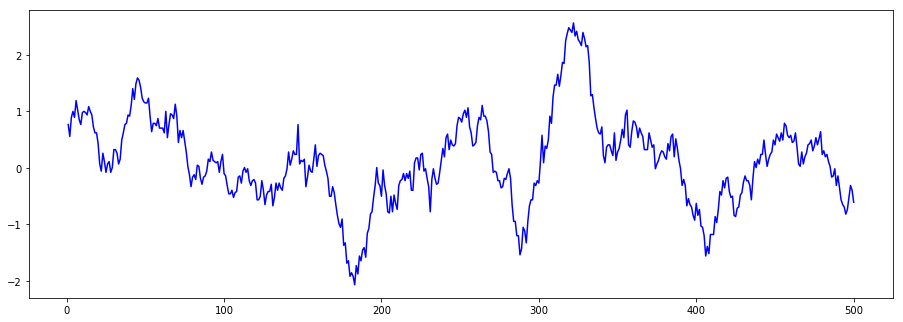

In [18]:
# plot an example of broadband ECoG
import matplotlib.pyplot as plt
%matplotlib inline
t = np.arange(1,500+1,1)
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.plot(t,Trials_Raw_T4[0:500,0],'b')


# Filtering the signal

In [19]:
from scipy.signal import butter, filtfilt, hilbert
import matplotlib.pyplot as plt

All_Signal = [Trials_Raw_T1, Trials_Raw_T2, Trials_Raw_T3, Trials_Raw_T4];

# initilize the values
class structtype():
    pass

HilbertTarget = [ structtype() for i in range(4)]
HilbertTarget[0].feature = [ structtype() for i in range(6)]
HilbertTarget[1].feature = [ structtype() for i in range(6)]
HilbertTarget[2].feature = [ structtype() for i in range(6)]
HilbertTarget[3].feature = [ structtype() for i in range(6)]

for target in range(4):
    print('Target:',target)
    Raw_Signals = All_Signal[target]
    
    # for delta band
    nyq = 0.5 * Fs
    low = 0.5/nyq
    high = 4/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[0] = Hil
    
    # for theta band
    nyq = 0.5 * Fs
    low = 4/nyq
    high = 8/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[1] = Hil
    
    # for alpha band
    nyq = 0.5 * Fs
    low = 8/nyq
    high = 13/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[2] = Hil
    
    # for beta band
    nyq = 0.5 * Fs
    low = 13/nyq
    high = 30/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[3] = Hil
    
    # for gamma1 band
    nyq = 0.5 * Fs
    low = 30/nyq
    high = 50/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[4] = Hil
    
    # for hg-lfo band
    nyq = 0.5 * Fs
    low = 70/nyq
    high = 150/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil1 = np.abs(hilbert(Filtered,axis=0))
    nyq = 0.5 * Fs
    low = 0.5/nyq
    high = 4/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered2 = filtfilt(b,a,Hil1,axis=0)
    Hil2 = Filtered2 + Hil1.mean(0)
    HilbertTarget[target].feature[5] = Hil2
    
print('End of Running Section')  


Target: 0
Target: 1
Target: 2
Target: 3
End of Running Section


(29093, 128)

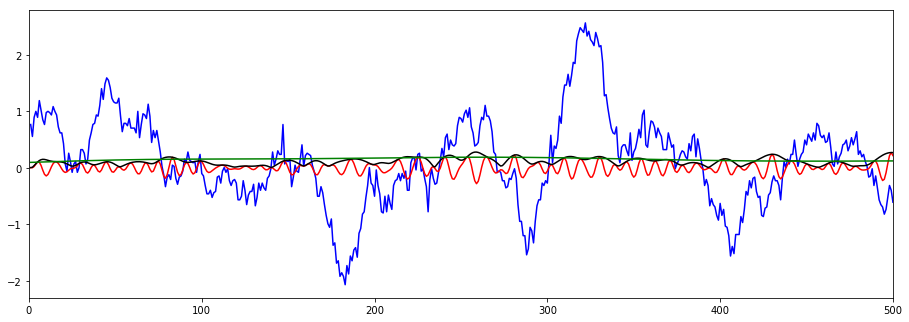

In [20]:
# test the process of filtering signal for hg-lfo
#a, b = Raw_Signals.shape
#t = np.arange(1,a+1,1)
t = np.arange(1,500+1,1)
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.plot(t,Raw_Signals[0:500,0],'b')
ax.plot(t,Filtered[0:500,0],'r')
ax.plot(t,Hil1[0:500,0],'k')
Forplot = HilbertTarget[3].feature[5]
ax.plot(t,Forplot[0:500,0],'g')
ax.set_xlim([0,500])
#ax.set_ylim([0,2])
Raw_Signals.shape

# decide the inputs to RNN

In [21]:
# choosing the broadband ECoG for trials
'''
Data_T1 = Trials_Raw_T1
Data_T2 = Trials_Raw_T2
Data_T3 = Trials_Raw_T3
Data_T4 = Trials_Raw_T4
'''

# or choose the feature hg-lfo

Data_T1 = HilbertTarget[0].feature[5]
Data_T2 = HilbertTarget[1].feature[5]
Data_T3 = HilbertTarget[2].feature[5]
Data_T4 = HilbertTarget[3].feature[5]


# choose other features.....






# Bring the data to torch space / peform RNN

In [22]:
import torch
import torch.nn as nn
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import DataLoader

In [23]:
# Hyper parameters
learning_rate = 0.001
sequence_length = 200
hidden_size = 50
num_classes = 4
batch_size = 64
input_size = 128
num_layers = 1
num_epochs = 3


In [24]:
# generate the train_data for RNN
# use neural feature as input or the broad band

Data_T1_torch = torch.from_numpy(Data_T1)
Data_T2_torch = torch.from_numpy(Data_T2)
Data_T3_torch = torch.from_numpy(Data_T3)
Data_T4_torch = torch.from_numpy(Data_T4)

In [25]:
Data_T1_torch

tensor([[0.1232, 0.1327, 0.2036,  ..., 0.1530, 0.1478, 0.1681],
        [0.1239, 0.1344, 0.2069,  ..., 0.1552, 0.1493, 0.1695],
        [0.1245, 0.1362, 0.2102,  ..., 0.1574, 0.1509, 0.1708],
        ...,
        [0.1215, 0.1523, 0.1901,  ..., 0.1590, 0.1453, 0.1672],
        [0.1216, 0.1523, 0.1901,  ..., 0.1590, 0.1453, 0.1672],
        [0.1216, 0.1523, 0.1901,  ..., 0.1590, 0.1453, 0.1672]],
       dtype=torch.float64)

In [26]:
print(f"Shape of tensor: {Data_T1_torch.shape}")
print(f"Datatype of tensor: {Data_T1_torch.dtype}")
print(f"Device tensor is stored on: {Data_T1_torch.device}")

Shape of tensor: torch.Size([25206, 128])
Datatype of tensor: torch.float64
Device tensor is stored on: cpu


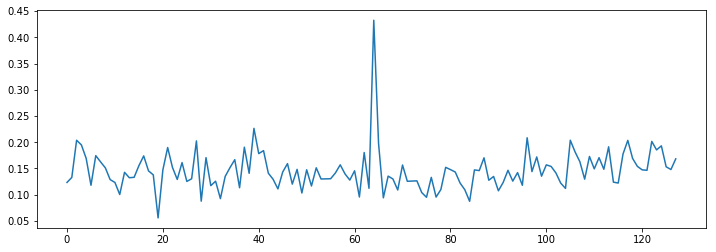

In [27]:
# ploting the first sample data for T1
DataPlot = Data_T1_torch.numpy()
plt.figure(figsize=(12,4))
plt.plot(np.arange(128), DataPlot[0][:])

In [28]:
# generating the labels for data
Y_T1_torch = 1 * torch.ones(Data_T1_torch.shape[0],1)
Y_T2_torch = 2 * torch.ones(Data_T2_torch.shape[0],1)
Y_T3_torch = 3 * torch.ones(Data_T3_torch.shape[0],1)
Y_T4_torch = 4 * torch.ones(Data_T4_torch.shape[0],1)

#Y_T1_torch = torch.zeros(window_size, 4)
#Y_T2_torch = torch.zeros(window_size, 4)
#Y_T3_torch = torch.zeros(window_size, 4)
#Y_T4_torch = torch.zeros(window_size, 4)


#Y_T1_torch[:,0] = 1 
#Y_T2_torch[:,1] = 1 
#Y_T3_torch[:,2] = 1 
#Y_T4_torch[:,3] = 1 

In [29]:
Y_T1_torch

tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

In [30]:
Y_T1_torch[0]

tensor([1.])

In [31]:
# preparing a batch 

def input_data(data, label, sequence_length, train_set):
    
   # creat this batch
    L = data.shape[0]
    
    for i in range(L-sequence_length):
        window = data[i:i+sequence_length][:]
        #label = label[i+ws:i+ws+1]
        train_set.append((window, label))

    return train_set
    
    

In [32]:
# by considering batch creation
# determining the temporal dynamics of ECoG 
# feed the data for creating the batches
# append all the targets
train_set = []    
Train_batch_1 = input_data(Data_T1_torch,Y_T1_torch[0], sequence_length, train_set)
Train_batch_2 = input_data(Data_T2_torch,Y_T2_torch[0], sequence_length, Train_batch_1)
Train_batch_3 = input_data(Data_T3_torch,Y_T3_torch[0], sequence_length, Train_batch_2)
Train_batch_4 = input_data(Data_T4_torch,Y_T4_torch[0], sequence_length, Train_batch_3)

In [33]:
train_set = Train_batch_4

In [34]:
len(train_set)

100432

In [35]:
train_set[0]

(tensor([[0.1232, 0.1327, 0.2036,  ..., 0.1530, 0.1478, 0.1681],
         [0.1239, 0.1344, 0.2069,  ..., 0.1552, 0.1493, 0.1695],
         [0.1245, 0.1362, 0.2102,  ..., 0.1574, 0.1509, 0.1708],
         ...,
         [0.1655, 0.2547, 0.3655,  ..., 0.2455, 0.2009, 0.2339],
         [0.1653, 0.2541, 0.3647,  ..., 0.2455, 0.2006, 0.2351],
         [0.1652, 0.2536, 0.3639,  ..., 0.2454, 0.2004, 0.2364]],
        dtype=torch.float64),
 tensor([1.]))

In [36]:
# consider only training set and shuffle all
train_loader = DataLoader(train_set, batch_size, shuffle=True)

In [38]:
# define the device for running on GUP or CPU

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)
            
def __len__(self):
    """Number of batches"""
    return len(self.dl)

In [39]:
device = get_default_device()

In [41]:
# creat the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='relu')
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        h = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        
        
        # We need to detach the hidden state to prevent exploding/vanishing gradients
        # This is part of truncated backpropagation through time (BPTT)
        
        out, _ = self.rnn(x, h.detach())  
        
        out = self.fc(out[:, -1, :])
        
        return out
    

In [40]:
help(nn.RNN)

Help on class RNN in module torch.nn.modules.rnn:

class RNN(RNNBase)
 |  RNN(*args, **kwargs)
 |  
 |  Applies a multi-layer Elman RNN with :math:`tanh` or :math:`ReLU` non-linearity to an
 |  input sequence.
 |  
 |  
 |  For each element in the input sequence, each layer computes the following
 |  function:
 |  
 |  .. math::
 |      h_t = \text{tanh}(W_{ih} x_t + b_{ih} + W_{hh} h_{(t-1)} + b_{hh})
 |  
 |  where :math:`h_t` is the hidden state at time `t`, :math:`x_t` is
 |  the input at time `t`, and :math:`h_{(t-1)}` is the hidden state of the
 |  previous layer at time `t-1` or the initial hidden state at time `0`.
 |  If :attr:`nonlinearity` is ``'relu'``, then `ReLU` is used instead of `tanh`.
 |  
 |  Args:
 |      input_size: The number of expected features in the input `x`
 |      hidden_size: The number of features in the hidden state `h`
 |      num_layers: Number of recurrent layers. E.g., setting ``num_layers=2``
 |          would mean stacking two RNNs together to for

In [42]:
model = RNNModel(input_size, hidden_size, num_layers, num_classes)
to_device(model, device)

RNNModel(
  (rnn): RNN(128, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=4, bias=True)
)

In [43]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [44]:
# Train the model

All_y_pred = []
All_y_train = []

#model = model.to(torch.long)
model = model.to(torch.float)

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #print(labels.shape)
        labels = labels.T[0,:]
        labels = labels-1
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(torch.long)
        labels = labels.to(device)
        
        #labels = labels.to(torch.float)
        
        # test with random inputs
        #target = torch.empty(batch_size, dtype=torch.long).random_(num_classes)
        #labels_1 = target
        
        #images = images.to(torch.long)
        images = images.to(torch.float)
        
        # for saving
        All_y_train.append(labels.numpy())
        
        # Forward pass
        outputs = model(images)
        #outputs = outputs.to(torch.long)
        outputs = outputs.to(torch.float)
        loss = criterion(outputs, labels)
        
        # for saving 
        _, predicted = torch.max(outputs.data, 1)
        All_y_pred.append(predicted.numpy())
        
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/3], Step [100/1570], Loss: 1.2843
Epoch [1/3], Step [200/1570], Loss: 1.2827
Epoch [1/3], Step [300/1570], Loss: 1.4647
Epoch [1/3], Step [400/1570], Loss: 1.1923
Epoch [1/3], Step [500/1570], Loss: 1.2478
Epoch [1/3], Step [600/1570], Loss: 1.0498
Epoch [1/3], Step [700/1570], Loss: 0.9056
Epoch [1/3], Step [800/1570], Loss: 0.9450
Epoch [1/3], Step [900/1570], Loss: 1.1199
Epoch [1/3], Step [1000/1570], Loss: 1.0551
Epoch [1/3], Step [1100/1570], Loss: 0.9621
Epoch [1/3], Step [1200/1570], Loss: 1.3508
Epoch [1/3], Step [1300/1570], Loss: 0.9860
Epoch [1/3], Step [1400/1570], Loss: 1.1052
Epoch [1/3], Step [1500/1570], Loss: 1.3164
Epoch [2/3], Step [100/1570], Loss: 1.3033
Epoch [2/3], Step [200/1570], Loss: 1.3081
Epoch [2/3], Step [300/1570], Loss: 1.3008
Epoch [2/3], Step [400/1570], Loss: 1.3279
Epoch [2/3], Step [500/1570], Loss: 1.2696
Epoch [2/3], Step [600/1570], Loss: 1.2782
Epoch [2/3], Step [700/1570], Loss: 1.2963
Epoch [2/3], Step [800/1570], Loss: 0.9532
Epoch

In [45]:
images.shape




torch.Size([16, 200, 128])

In [245]:
labels-1

tensor([3, 3, 3, 0, 0, 0, 2, 2, 0, 2, 3, 3, 0, 2, 1, 2, 3, 1, 1, 3, 3, 3, 2, 0,
        1, 2, 0, 1, 1, 0, 0, 0, 3, 2, 2, 2, 2, 2, 0, 0, 3, 0, 3, 1, 0, 1, 3, 3,
        2, 1, 3, 3, 1, 0, 0, 0, 3, 3, 1, 2, 1, 3, 0, 3])

In [244]:
labels_1

tensor([1, 2, 2, 2, 3, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 3, 1, 3, 3, 2, 0, 3, 2, 1,
        3, 0, 0, 3, 0, 2, 3, 0, 2, 0, 0, 3, 2, 0, 2, 1, 3, 0, 2, 2, 1, 3, 2, 2,
        2, 2, 3, 0, 3, 1, 0, 2, 3, 1, 0, 2, 3, 0, 3, 3])

In [48]:
# check the number of parameters in layers
for p in model.parameters():
    print(p.numel())

6400
2500
50
50
200
4


In [49]:
All_y_pred[0]
#All_y_train = []

array([3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3,
       2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2])

In [50]:
All_y_train[0].T

array([0, 2, 3, 2, 2, 0, 2, 1, 3, 3, 2, 3, 1, 0, 3, 2, 0, 0, 2, 3, 0, 2,
       0, 0, 2, 0, 0, 1, 3, 0, 3, 1, 1, 1, 0, 2, 2, 1, 3, 1, 3, 3, 0, 3,
       1, 2, 2, 3, 2, 2, 3, 3, 1, 3, 0, 0, 3, 0, 1, 1, 3, 3, 3, 1])

In [51]:
((All_y_pred[0] == All_y_train[0].T).sum().item())/batch_size*100

29.6875

In [52]:
Accuracies = []
for i in range(len(All_y_pred)):
    acc = ((All_y_pred[i] == All_y_train[i].T).sum().item())/batch_size*100
    Accuracies.append(acc)
    
    

Text(0.5, 0, 'Batch Number')

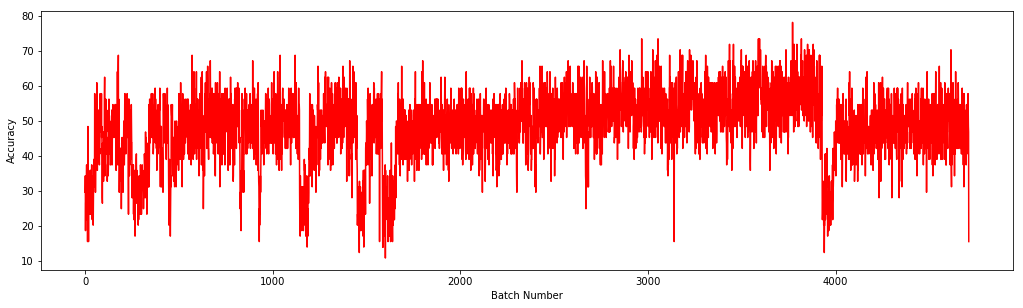

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
t_bin = np.arange(0,len(All_y_pred),1)
fig = plt.figure(figsize=(15,4))
ax = fig.add_axes([.10,.10,0.9,.9])
ax.plot(t_bin,Accuracies,'r')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Batch Number')
#plt.savefig('RNN_Classification1_4target.png',facecolor='w', transparent=False, dpi=300)
